In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from sklearn.decomposition import PCA
from IPython import display

from colour import * 

In [7]:
im_path = 'lib/images/'
im = np.asarray(Image.open(im_path + os.listdir(im_path)[0])) / 255

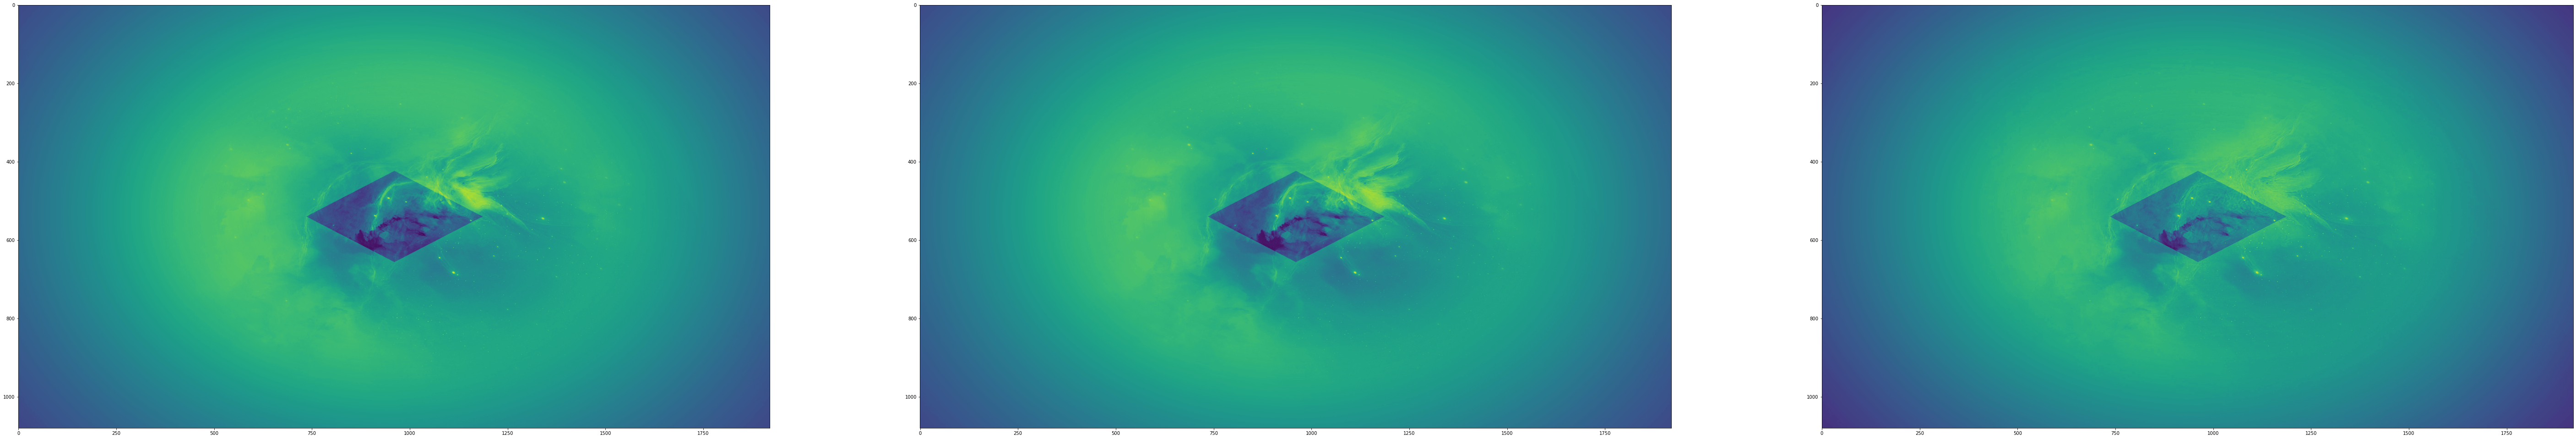

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(100, 100))

for i in range(3):
    axes[i].imshow(im.transpose(2, 0, 1)[i])

In [97]:
rgb_points = im.reshape(im.shape[0] * im.shape[1], im.shape[2])
rgb_points.shape

(2073600, 3)

In [98]:
rgb_points_sample = rgb_points[np.random.choice(rgb_points.shape[0], 10000, replace=False), :]
rgb_points_sample.shape

(10000, 3)

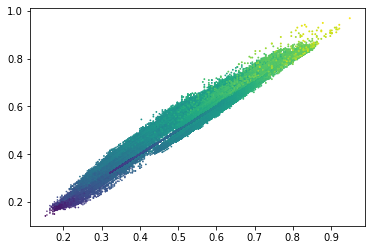

In [13]:
plt.scatter(*rgb_points.transpose(), c=rgb_points.transpose()[2])

In [192]:
hsl_points = np.array(rgb2hsl(*im.transpose(2, 0, 1)))
hsl_points = hsl_points.reshape(hsl_points.shape[0], hsl_points.shape[1] * hsl_points.shape[2]).transpose()

In [193]:
hsl_points_sample = hsl_points[np.random.choice(hsl_points.shape[0], 10000, replace=False), :]
hsl_points_sample.shape

(10000, 3)

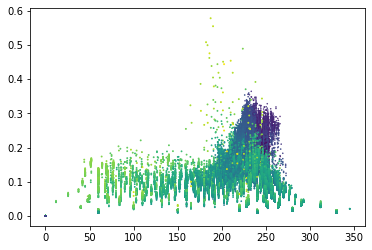

In [29]:
plt.scatter(*hsl_points.transpose(), c=hsl_points.transpose()[2])

In [30]:
pca = PCA().fit(rgb_points)

In [227]:
print('vectors')
for v in pca.components_:
    print(v)
print('explained_variance', pca.explained_variance_)
print('explained_variance_ratio', pca.explained_variance_ratio_)
print('singular_value', pca.singular_values_)

vectors
[-0.57382803 -0.57066667 -0.58741888]
[-0.4638208  -0.36469446  0.80738356]
[-0.6749753   0.73575642 -0.05541517]
explained_variance [2.92231211e-02 5.93410962e-04 5.82396070e-05]
explained_variance_ratio [0.97818726 0.01986328 0.00194946]
singular_value [246.16464957  35.0784318   10.98933987]


In [99]:
origin = np.array([np.mean(rgb_points, axis=0)]*3)
origin

array([[0.56954667, 0.56906541, 0.58393394],
       [0.56954667, 0.56906541, 0.58393394],
       [0.56954667, 0.56906541, 0.58393394]])

Text(0.5, 0, 'blue')

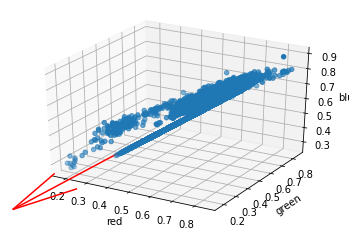

In [228]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(*origin.transpose(), 
          *((pca.explained_variance_ratio_ * np.array([[1]*3]*3)).transpose() * pca.components_).transpose(), 
          color='red', length=1)
ax.scatter(*rgb_points_sample.transpose())
ax.set_xlabel('red')
ax.set_ylabel('green')
ax.set_zlabel('blue')

In [194]:
hsl_origin = np.array([np.mean(hsl_points, axis=0)]*3)
hsl_origin

array([[9.75574366e+01, 2.33422901e-02, 5.75627978e-01],
       [9.75574366e+01, 2.33422901e-02, 5.75627978e-01],
       [9.75574366e+01, 2.33422901e-02, 5.75627978e-01]])

In [195]:
hsl_pca = PCA().fit(hsl_points)

In [196]:
print('vectors')
for v in hsl_pca.components_:
    print(v)
print('explained_variance', hsl_pca.explained_variance_)
print('singular_value', hsl_pca.singular_values_)

vectors
[9.99999861e-01 2.29027971e-04 4.74426387e-04]
[ 4.41184974e-04  1.28080253e-01 -9.91763709e-01]
[-2.87906281e-04  9.91763781e-01  1.28080134e-01]
explained_variance [1.45390980e+04 6.60336976e-03 1.06836740e-03]
singular_value [1.73632541e+05 1.17015986e+02 4.70676702e+01]


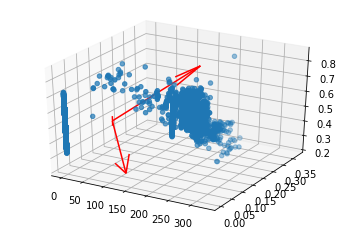

In [199]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(*hsl_origin.transpose(), *hsl_pca.components_.transpose(), color='red', length=0.4)
ax.scatter(*hsl_points_sample.transpose())

In [198]:
nhsl_points = np.copy(hsl_points)
nhsl_points[:, 0] /= 360

In [163]:
nhsl_points_sample = nhsl_points[np.random.choice(nhsl_points.shape[0], 10000, replace=False), :]
nhsl_points_sample.shape

(10000, 3)

In [165]:
nhsl_pca = PCA().fit(nhsl_points)

In [200]:
print('vectors')
for v in nhsl_pca.components_:
    print(v)
print('explained_variance', nhsl_pca.explained_variance_)
print('explained_variance_ratio', nhsl_pca.explained_variance_ratio_)
print('singular_value', nhsl_pca.singular_values_)

vectors
[0.98091375 0.08061037 0.17694683]
[ 0.16393391  0.14652719 -0.97552829]
[-0.10456522  0.98591671  0.13051576]
explained_variance [0.11640082 0.00643353 0.00105685]
explained_variance_ratio [0.93954068 0.05192885 0.00853047]
singular_value [491.29281386 115.50132479  46.81328734]


In [201]:
nhsl_origin = np.array([np.mean(nhsl_points, axis=0)]*3)
nhsl_origin

array([[0.27099288, 0.02334229, 0.57562798],
       [0.27099288, 0.02334229, 0.57562798],
       [0.27099288, 0.02334229, 0.57562798]])

Text(0.5, 0, 'lightness')

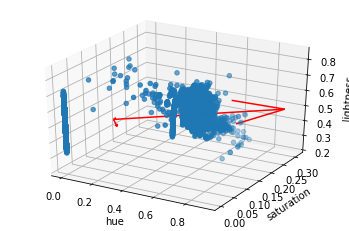

In [230]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(*nhsl_origin.transpose(), 
          *((nhsl_pca.explained_variance_ratio_ * np.array([[1]*3]*3)).transpose() * nhsl_pca.components_).transpose(), 
          color='red', length=1)
ax.scatter(*nhsl_points_sample.transpose())
ax.set_xlabel('hue')
ax.set_ylabel('saturation')
ax.set_zlabel('lightness')

In [223]:
(nhsl_pca.explained_variance_ratio_ * np.array([[1]*3]*3)).transpose() * nhsl_pca.components_

array([[ 9.21608371e-01,  7.57367265e-02,  1.66248749e-01],
       [ 8.51289951e-03,  7.60898836e-03, -5.06580615e-02],
       [-8.91990680e-04,  8.41033450e-03,  1.11336101e-03]])